https://www.acmicpc.net/problem/2606    
신종 바이러스인 웜 바이러스는 네트워크를 통해 전파된다. 한 컴퓨터가 웜 바이러스에 걸리면 그 컴퓨터와 네트워크 상에서 연결되어 있는 모든 컴퓨터는 웜 바이러스에 걸리게 된다.

예를 들어 7대의 컴퓨터가 <그림 1>과 같이 네트워크 상에서 연결되어 있다고 하자. 1번 컴퓨터가 웜 바이러스에 걸리면 웜 바이러스는 2번과 5번 컴퓨터를 거쳐 3번과 6번 컴퓨터까지 전파되어 2, 3, 5, 6 네 대의 컴퓨터는 웜 바이러스에 걸리게 된다. 하지만 4번과 7번 컴퓨터는 1번 컴퓨터와 네트워크상에서 연결되어 있지 않기 때문에 영향을 받지 않는다.     
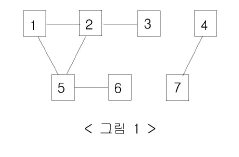      
어느 날 1번 컴퓨터가 웜 바이러스에 걸렸다. 컴퓨터의 수와 네트워크 상에서 서로 연결되어 있는 정보가 주어질 때, 1번 컴퓨터를 통해 웜 바이러스에 걸리게 되는 컴퓨터의 수를 출력하는 프로그램을 작성하시오. 

입력:   
첫째 줄에는 컴퓨터의 수가 주어진다. 컴퓨터의 수는 100 이하인 양의 정수이고 각 컴퓨터에는 1번 부터 차례대로 번호가 매겨진다. 둘째 줄에는 네트워크 상에서 직접 연결되어 있는 컴퓨터 쌍의 수가 주어진다. 이어서 그 수만큼 한 줄에 한 쌍씩 네트워크 상에서 직접 연결되어 있는 컴퓨터의 번호 쌍이 주어진다.  

출력:   
1번 컴퓨터가 웜 바이러스에 걸렸을 때, 1번 컴퓨터를 통해 웜 바이러스에 걸리게 되는 컴퓨터의 수를 첫째 줄에 출력한다.

7
6
1 2
2 3
1 5
5 2
5 6
4 7

In [11]:
#bfs

from collections import deque
from sys import stdin

# input = stdin.readline
input = open("input2606.txt","rt").readline

N = int(input())
M = int(input())

infection_list = []
visited = [False] * N
adj_list =[[] for _ in range(N)]


for _ in range(M):
    a, b = map(int, input().split())
    adj_list[a - 1].append(b)
    adj_list[b - 1].append(a)

print(adj_list)
queue = deque([1])
visited[0] = True

while queue:
    V = queue.popleft()
    if V != 1:
        infection_list.append(V)
    for c in adj_list[V-1]:
        if not visited[c-1]:
            visited[c-1] = True
            queue.append(c)
            
print(len(infection_list))

[[2, 5], [1, 3, 5], [2], [7], [1, 2, 6], [5], [4]]
[2, 5, 3, 6]
4


In [17]:
# dfs (2등꺼 참고)
from sys import stdin

# input = stdin.readline
input = open("input2606.txt","rt").readline

def dfs(s):
    visited[s-1] = True
    infection_list.append(s)
    for com in adj_list[s-1]:
        if not visited[com-1]:
            dfs(com)
        

N = int(input())
M = int(input())

infection_list = []
visited = [False] * N
adj_list =[[] for _ in range(N)]


for _ in range(M):
    a, b = map(int, input().split())
    adj_list[a - 1].append(b)
    adj_list[b - 1].append(a)

dfs(1)
print(infection_list)
print(len(infection_list)-1)


[1, 2, 3, 5, 6]
4


In [ ]:
# 1등 코드 - 좀 별로 쩐다 이런게 안느껴짐

import sys

input = sys.stdin.readline

a = int(input())

b = int(input())

b_lst = []

result = set()
for i in range(b) :
    num = list(map(int,input().split()))
    if 1 in num :
        result.add(num[0])
        result.add(num[1])
    else :
        b_lst.append(num)
    
while True :
    for i in b_lst :
        if i[0] in result :
            result.add(i[1])
            b_lst.remove(i)
            break
        elif i[1] in result :
            result.add(i[0])
            b_lst.remove(i)
            break
    else :
        break


print(len(result) - 1 )

In [ ]:
# 2등 코드
import sys
input = sys.stdin.readline

def dfs(n):
	visited[n] = True
	answer.append(n)
	for n_num in graph[n]:
		if not visited[n_num]:
			dfs(n_num)
	return

n = int(input())
p = int(input())

answer = []
visited = [False] * (n+1)
graph = [[]*(n+1) for _ in range(n+1)]
for _ in range(p):
    
	a, b  = map(int, input().split())
	
	graph[a].append(b)
	graph[b].append(a)

dfs(1)
print(len(answer[1:]))

In [ ]:
# 몇등인지는 모르겠고 그냥 우연히 눌렀는데 신박한 방식
import sys
readline = sys.stdin.readline
num_of_com = int(readline())
visited = [False for _ in range(num_of_com + 1)]
graph = dict()
for _ in range(int(readline())):
    a,b = map(int,readline().split())
    if a in graph: graph[a].add(b)
    else: graph[a] = {b}
    if b in graph: graph[b].add(a)
    else: graph[b] = {a}
#dfs
sys.setrecursionlimit(1000000)
def spred(parent):
    global visited, graph
    children = graph[parent]
    visited[parent] = True
    for child in children:
        if not visited[child]: spred(child)
spred(1)
print(visited.count(True) - 1)